# Projeto 3

### Importando bibliotecas

In [331]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

### Parâmetros

In [332]:
massa_bola=2 # kg
k_mola=2981 # N/m
g=9.8 # m/s^2
Cd=0.47 # Coeficiente de arrasto
p=1.2 # kg/m^3
A=pi*0.1**2 # m^2
c=7.0 # N.s/m

### Condições iniciais

In [333]:
# Condições iniciais

y_0 = 1.025 # posicao inicial no eixo y
Vy_0 = -1 # velocidade inicial na direção do eixo y
condicoes_iniciais = [y_0, Vy_0] 

### Lista de tempo

In [334]:
tempo_inicial = 0
tempo_final = 8
dt = 1e-2

tempo = np.arange(tempo_inicial, tempo_final, dt)

### Define a função modelo

In [335]:
def modelo(X,t):
    
    y = X[0] # Posição y
    vy = X[1] # Velocidade y

    D = 1/2 * p * Cd * A * (vy) * abs(vy)
    Fel = k_mola * (-y) # Força elástica
    P = massa_bola * g # Peso
    F_amort = c * (-vy) # Força amortecimento

    if y>0:
        Fel=0
        F_amort = 0
    
    elif y<0 and vy>0:
        F_amort = 0
        D = 0

    
    # Equações diferenciais
    dydt = vy
    dvydt = (-P + Fel - D + F_amort) / massa_bola

    return [dydt,dvydt]


## ODEINT + Plot

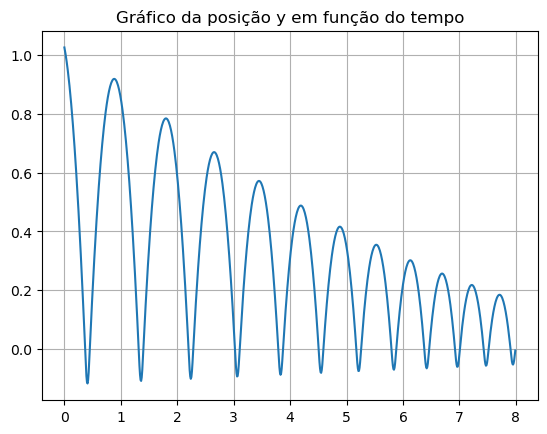

In [336]:
solucao_odeint = odeint(modelo, condicoes_iniciais, tempo)
lista_y = solucao_odeint[:,0]
lista_vy = solucao_odeint[:,1]


plt.plot(tempo, lista_y, label='y(t)')
plt.title('Gráfico da posição y em função do tempo')
plt.grid()
plt.show()

## Validação

### Acessando os dados do arquivo .txt

In [337]:
dados = "dados.txt"

# Passo 1: Abra o arquivo em modo de leitura
arquivo = open(dados, "r")

# Passo 2: Leia o conteúdo do arquivo
conteudo = arquivo.read()

# Passo 3: Feche o arquivo
arquivo.close()

# Passo 4: Divida o conteúdo em linhas
linhas = conteudo.splitlines()

# Passo 5: Armazene as linhas em uma lista
solucao = list(linhas)

# Lista
lista_altura = []
lista_tempo = []

# Adiciona +1.344 ao tempo devido ao momento de lançamento da bola no vídeo
for i in range(len(solucao)):
    lista_altura.append(float(solucao[i].split(',')[0]))
    lista_tempo.append(float(solucao[i].split(',')[1]) - 1.344 )


[-0.010000000000000009, 0.0, 0.010000000000000009, 0.020000000000000018, 0.028999999999999915, 0.038999999999999924, 0.04899999999999993, 0.05899999999999994, 0.06899999999999995, 0.07899999999999996, 0.08899999999999997, 0.09899999999999998, 0.10799999999999987, 0.11799999999999988, 0.1279999999999999, 0.1379999999999999, 0.1479999999999999, 0.15799999999999992, 0.16799999999999993, 0.17799999999999994, 0.18699999999999983, 0.19699999999999984, 0.20699999999999985, 0.21699999999999986, 0.22699999999999987, 0.23699999999999988, 0.2469999999999999, 0.2569999999999999, 0.266, 0.276, 0.2859999999999998, 0.2959999999999998, 0.3059999999999998, 0.31599999999999984, 0.32599999999999985, 0.33599999999999985, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.4149999999999998, 0.4249999999999998, 0.43399999999999994, 0.44399999999999995, 0.45399999999999996, 0.46399999999999997, 0.474, 0.484, 0.494, 0.504, 0.5129999999999999, 0.5229999999999999, 0.5329999999999999, 0.5429999999999999, 0.552999

### Plotando os dados

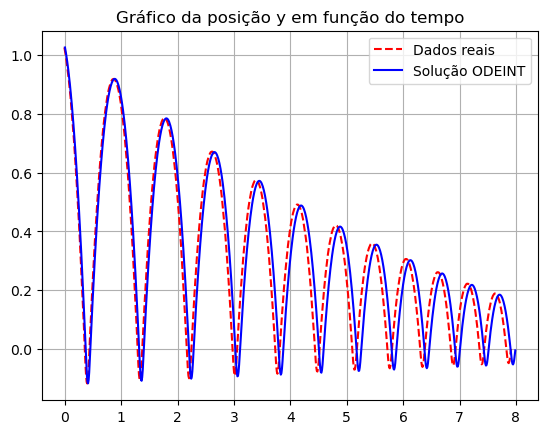

In [339]:
plt.plot(lista_tempo, lista_altura,'r--',label='Dados reais' )
plt.plot(tempo, lista_y, label='Solução ODEINT', color='blue')
plt.title('Gráfico da posição y em função do tempo')
plt.legend()
plt.grid()
plt.show()